In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from astropy.table import Table
t = Table.read('../NGC2264_2.vot', format='votable')

print("Finished reading Table. Read ",len(t['__Gmag_'])," sources")

Finished reading Table. Read  34126  sources


In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


In [4]:
RA = t['RA_ICRS']
DE = t['DE_ICRS']
plx = t['Plx']
num = len(RA)

X1 = np.zeros(num)
Y1 = np.zeros(num)
for i in range(0,num):
    X1[i] = RA[i]
    Y1[i] = DE[i]
X = np.column_stack((X1,Y1))
print(len(X))

34126


In [30]:
#create mapping function
def distance_map(data,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour):
    from scipy.spatial import KDTree

    #use KD tree to find distances to nearest neighbor stars
    tree = KDTree(data)
    
    diffRA = (RAmax - RAmin)
    diffDE = (DEmax - DEmin)
    
    pixel_count2 = pixel_count
    
    if (diffRA < diffDE):
        dDE = diffDE/pixel_count2
        pixel_count1 = int(diffRA/dDE)
        dRA = diffRA/pixel_count
    if (diffRA > diffDE):
        dRA = diffRA/pixel_count
        pixel_count2 = int(diffDE/dRA)
        dDE = diffDE/pixel_count2
    if (diffRA == diffDE):
        dRA = diffRA/pixel_count
        dDE = diffDE/pixel_count
        
    #create array of coordinates for image background
    for i in range(0,pixel_count):
        for j in range(0,pixel_count2):
            if (i==0 and j == 0):
                array4 = np.array([RAmin,DEmin])
            else:
                array3 = [RAmin+i*dRA,DEmin+j*dDE]
                array4 = np.vstack((array4,array3))

    #find nearest neighbor distances to background points
    image = tree.query(array4,k=neighbor+1)

    #change array of background points so it is pixel_count x pixel_count2
    dist2 = image[0][:,neighbor-1]
    dist2 = np.resize(dist2,(pixel_count,pixel_count2))
    dist2 = np.rot90(dist2, k=1, axes=(1,0))
    dist2 = np.fliplr(dist2)

    #display map   
    plt.imshow(dist2, origin='lower',extent=[RAmin,RAmax,DEmin,DEmax])
    plt.show()
    
    #contours
    if (contour == True):
        ct = plt.contourf(dist2, cmap='tab10',extent=[RAmin,RAmax,DEmin,DEmax])
        plt.colorbar()
    if (scatter == True):
        plt.scatter(data[:,0],data[:,1],s = 1,c = 'k')
        plt.show()
    return

In [27]:
RAmin = min(RA)
RAmax = max(RA)
DEmin = min(DE)
DEmax = max(DE)

RA_range = RAmax - RAmin
DE_range = DEmax - DEmin

print(RA_range)
print(DE_range)

0.9999910531
1.6899573159


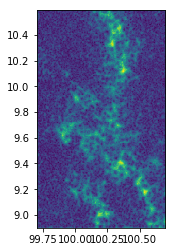

Elapsed time is: 26.166381558403373


In [28]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 250
image = True
scatter = False
contour = False
neighbor = 5

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

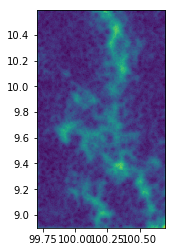

Elapsed time is: 40.653415352106094


In [29]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 250
image = True
scatter = False
contour = False
neighbor = 20

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))